In [14]:
import pandas as pd
import numpy as np
import matplotlib as mth

In [43]:
dollar=pd.read_excel("./datas/dolarBRL2011.2021.xlsx")
barril=pd.read_excel("./datas/petroleo.2011.2021.xlsx")

dollar['V.Médio']=(dollar['Máxima']+dollar['Mínima'])/2
dollar['Data']=pd.to_datetime(dollar['Data'],format='%m/%y')
dollar.sort_values('Data',inplace=True)
dollar.set_index('Data',inplace=True)
dollar.rename_axis('Período',inplace=True)

barril['V.Médio']=(barril['Máxima']+barril['Mínima'])/2
barril['Data']=pd.to_datetime(barril['Data'],format='%m/%y')
barril.sort_values('Data',inplace=True)
barril.set_index('Data',inplace=True)
barril.rename_axis('Período',inplace=True)

dollar['VUS.Norm']=dollar['V.Médio']/dollar['V.Médio'].max()
barril['VBar.Norm']=barril['V.Médio']/barril['V.Médio'].max()

In [44]:
dollar.head()

,Último,Abertura,Máxima,Mínima,Var%,V.Médio,VUS.Norm
Período,,,,,,,
2011-01-01,1.6670,1.6593,1.6965,1.6432,0.0046,1.66985,0.294847
2011-02-01,1.6635,1.6669,1.6862,1.6554,-0.0021,1.67080,0.295015
2011-03-01,1.6315,1.6635,1.6931,1.6207,-0.0192,1.65690,0.292560
2011-04-01,1.5765,1.6308,1.6308,1.5562,-0.0337,1.59350,0.281366
2011-05-01,1.5795,1.5765,1.6458,1.5688,0.0019,1.60730,0.283802


In [3]:
df_gas = pd.read_csv('C:/Users/ednae/Documents/Linguagens/data2/df_gas.csv')
df_gas['Data da Coleta']=pd.to_datetime(df_gas['Data da Coleta'],format="%d/%m/%Y")
df_gas.sort_values('Data da Coleta',inplace=True)
df_gas.set_index('Data da Coleta',drop=False,inplace=True)
df_gas.rename_axis('Período',inplace=True)
df_gas.drop(['Municipio','Complemento'],axis=1,inplace=True)
df_gas.drop(['Bandeira'],axis=1,inplace=True)
df_gas.drop(['Município','Cep','Número Rua','Numero Rua','Regiao - Sigla','Região - Sigla'],axis=1,inplace=True)

df_gas['ano']=df_gas['Data da Coleta'].dt.year
df_gas['mes']=df_gas['Data da Coleta'].dt.month
df_gas['dia']=df_gas['Data da Coleta'].dt.day

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,3,7,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## <b><i> Justificando uso da média, mostrando que o desvio padrão é baixo

In [4]:
mix_resumo=df_gas.groupby(['ano','mes','dia']).agg({'Valor de Venda':['mean','std','max','min']})
print(mix_resumo['Valor de Venda']['std'].max(),'desvio padrão máximo em todas as médias diárias calculadas')

0.4396596627479246 desvio padrão máximo em todas as médias diárias calculadas


In [5]:
df_gas2 = pd.DataFrame(df_gas['Valor de Venda'].resample('D').mean())
df_gas2['pct_change']=df_gas2.pct_change()*100
dif_med_mensal = df_gas2['pct_change'].resample('M').mean()

In [ ]:
dif_med_mensal.dt.strftime('%Y-%m')

In [4]:
gas_med_mensal = df_gas['Valor de Venda'].resample('M').mean()

In [63]:
barril['pct_change']=barril['V.Médio'].pct_change()*100
dollar['pct_change']=dollar['V.Médio'].pct_change()*100

In [64]:
barril.loc['2016':,'pct_change'].describe()

count    69.000000
mean      1.430261
std      10.088836
min     -31.349387
25%      -3.778461
50%       2.695999
75%       7.244795
max      29.545455
Name: pct_change, dtype: float64

# <b> Correlações dos valores brutos

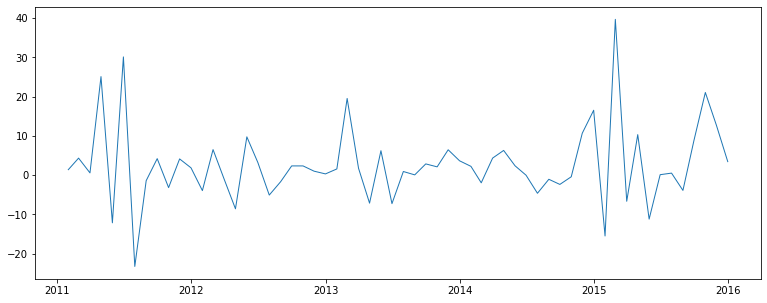

In [60]:
plt.figure(figsize=(13,5))
plt.plot(dif_med_mensal.loc['2011':'2015']*100,markersize=8,linestyle='-',linewidth=1,label='Variação mensal')

In [11]:
comp=pd.DataFrame({'bar':barril.loc[:'2015','V.Médio'],'dol':dollar.loc[:'2015','V.Médio'],'gas':gas_med_mensal[:'2015']})
comp.reset_index(inplace=True)
comp['mes']=comp['Período'].dt.month
comp['ano']=comp['Período'].dt.year
resum=pd.DataFrame(comp.groupby(['mes','ano']).agg(['mean']))
resum.corr()#controle de preço

,,bar,dol,gas
,,mean,mean,mean
bar,mean,1.000000,-0.898977,-0.879464
dol,mean,-0.898977,1.000000,0.938624
gas,mean,-0.879464,0.938624,1.000000


In [ ]:
from matplotlib import pyplot as plt
plt.plot(resum['bar'])

In [12]:
comp2=pd.DataFrame({'bar':barril.loc['2016':,'V.Médio'],'dol':dollar.loc['2016':,'V.Médio'],'gas':gas_med_mensal['2016':]})
comp2.reset_index(inplace=True)
comp2['mes']=comp['Período'].dt.month
comp2['ano']=comp['Período'].dt.year
resum2=pd.DataFrame(comp2.groupby(['mes','ano']).agg(['mean']))
resum2.corr()#PPI

,,bar,dol,gas
,,mean,mean,mean
bar,mean,1.00000,-0.396020,0.598330
dol,mean,-0.39602,1.000000,0.423181
gas,mean,0.59833,0.423181,1.000000


In [167]:
plt.figure(figsize=(13,5))
xx1=gas_med_mensal
xx2=dollar.loc[:,'V.Médio']
xx3=barril.loc[:,'V.Médio']

xx1=xx1.reset_index()
xx2=xx2.reset_index()
xx3=xx3.reset_index()

xx1['dd']=xx1['Período'].dt.strftime('%Y-%m')
xx2['dd']=xx2['Período'].dt.strftime('%Y-%m')
xx3['dd']=xx3['Período'].dt.strftime('%Y-%m')

del(xx1['Período'])
del(xx2['Período'])
del(xx3['Período'])

xx1.set_index('dd',inplace=True)
xx2.set_index('dd',inplace=True)
xx3.set_index('dd',inplace=True)

print(len(xx1),len(xx2),len(xx3))

129 129 129


<Figure size 936x360 with 0 Axes>

In [199]:
xx1.isna().sum()

Valor de Venda    0
dtype: int64

In [190]:
aa=xx1.isnull()
aa[aa['Valor de Venda']==True]

,Valor de Venda
dd,
2014-06,True
2020-09,True


In [197]:
xx1.loc['2014-06','Valor de Venda']=(xx1.loc['2014-05','Valor de Venda']+xx1.loc['2014-07','Valor de Venda'])/2

In [198]:
xx1.loc['2020-09','Valor de Venda']=(xx1.loc['2020-08','Valor de Venda']+xx1.loc['2020-10','Valor de Venda'])/2

In [200]:
import scipy.stats as sst

print("#########Controle de preço###########\n")
print(sst.pearsonr(xx1.loc['2011-02':'2015-12','Valor de Venda'],xx2.loc['2011-02':'2015-12','V.Médio']),'gas x dollar')
print(sst.pearsonr(xx1.loc['2011-02':'2015-12','Valor de Venda'],xx3.loc['2011-02':'2015-12','V.Médio']),'gas x barril')
print(sst.pearsonr(xx2.loc['2011-02':'2015-12','V.Médio'],xx3.loc['2011-02':'2015-12','V.Médio']),'barril x dollar')

print("\n#########PPI###########\n")
print(sst.pearsonr(xx1.loc['2016':,'Valor de Venda'],xx2.loc['2016':,'V.Médio']),'gas x dollar')
print(sst.pearsonr(xx1.loc['2016':,'Valor de Venda'],xx3.loc['2016':,'V.Médio']),'gas x barril')
print(sst.pearsonr(xx2.loc['2016':,'V.Médio'],xx3.loc['2016':,'V.Médio']),'barril x dollar')

#########Controle de preço###########

(0.936547536210911, 1.2578454656640535e-27) gas x dollar
(-0.8855090118288553, 1.2519826146268777e-20) gas x barril
(-0.9070948292406822, 4.391580457983893e-23) barril x dollar

#########PPI###########

(0.6374293935432829, 3.874196387254758e-09) gas x dollar
(0.5887618239306045, 1.0322307674214195e-07) gas x barril
(-0.13150435947072037, 0.28144142580938486) barril x dollar


# <b> Correlações das variações mensais

In [142]:
comp=pd.DataFrame({'var_bar':barril.loc[:'2015','pct_change'],'var_dol':dollar.loc[:'2015','pct_change'],'var_gas':dif_med_mensal[:'2015']})
comp.reset_index(inplace=True)
comp['mes']=comp['Período'].dt.month
comp['ano']=comp['Período'].dt.year
resum3=pd.DataFrame(comp.groupby(['mes','ano']).agg(['mean']))
resum3.corr()#controle de preço

,,var_bar,var_dol,var_gas
,,mean,mean,mean
var_bar,mean,1.000000,-0.247628,0.131917
var_dol,mean,-0.247628,1.000000,-0.043486
var_gas,mean,0.131917,-0.043486,1.000000


In [141]:
comp=pd.DataFrame({'var_bar':barril.loc['2016':,'pct_change'],'var_dol':dollar.loc['2016':,'pct_change'],'var_gas':dif_med_mensal['2016':]})
comp.reset_index(inplace=True)
comp['mes']=comp['Período'].dt.month
comp['ano']=comp['Período'].dt.year
resum4=pd.DataFrame(comp.groupby(['mes','ano']).agg(['mean']))
resum4.corr()#PPI

,,var_bar,var_dol,var_gas
,,mean,mean,mean
var_bar,mean,1.000000,-0.50715,0.505854
var_dol,mean,-0.507150,1.00000,-0.116790
var_gas,mean,0.505854,-0.11679,1.000000


In [153]:
plt.figure(figsize=(13,5))
x1=dif_med_mensal
x2=dollar.loc[:,'pct_change']
x3=barril.loc[:,'pct_change']

x1=x1.reset_index()
x2=x2.reset_index()
x3=x3.reset_index()

x1['dd']=x1['Período'].dt.strftime('%Y-%m')
x2['dd']=x2['Período'].dt.strftime('%Y-%m')
x3['dd']=x3['Período'].dt.strftime('%Y-%m')

del(x1['Período'])
del(x2['Período'])
del(x3['Período'])

x1.set_index('dd',inplace=True)
x2.set_index('dd',inplace=True)
x3.set_index('dd',inplace=True)

print(len(x1),len(x2),len(x3))

<Figure size 936x360 with 0 Axes>

In [163]:
import scipy.stats as sst

print("#########Controle de preço###########\n")
print(sst.pearsonr(x1.loc['2011-02':'2015-12','pct_change'],x2.loc['2011-02':'2015-12','pct_change']),'gas x dollar')
print(sst.pearsonr(x1.loc['2011-02':'2015-12','pct_change'],x3.loc['2011-02':'2015-12','pct_change']),'gas x barril')
print(sst.pearsonr(x2.loc['2011-02':'2015-12','pct_change'],x3.loc['2011-02':'2015-12','pct_change']),'barril x dollar')

print("\n#########PPI###########\n")
print(sst.pearsonr(x1.loc['2016':,'pct_change'],x2.loc['2016':,'pct_change']),'gas x dollar')
print(sst.pearsonr(x1.loc['2016':,'pct_change'],x3.loc['2016':,'pct_change']),'gas x barril')
print(sst.pearsonr(x2.loc['2016':,'pct_change'],x3.loc['2016':,'pct_change']),'barril x dollar')

#########Controle de preço###########

(-0.04348611580392113, 0.7436443228796653) gas x dollar
(0.1319167231801105, 0.31927321411149123) gas x barril
(-0.24762793237809155, 0.058632894410460025) barril x dollar

#########PPI###########

(-0.11678962883461977, 0.33923390858893326) gas x dollar
(0.5058541865945236, 9.255565078117152e-06) gas x barril
(-0.5071502368802205, 8.703715171231846e-06) barril x dollar


In [212]:
x3.loc['2016':,'pct_change']

dd
2016-01   -18.568260
2016-02     1.255863
2016-03    17.289301
2016-04     9.275067
2016-05     9.408884
             ...    
2021-05     3.540707
2021-06     8.218975
2021-07    -0.418123
2021-08    -3.641244
2021-09     7.407672
Name: pct_change, Length: 69, dtype: float64

# GRÁFICOS DAS OBSERVAÇÕES COMBINADAS

In [234]:
combined11=pd.DataFrame()
combined11['gas']=xx1.loc['2011-01':'2015-12','Valor de Venda']
combined11['dol']=xx2.loc['2011-02':'2015-12','V.Médio']
combined11['bar']=xx3.loc['2011-02':'2015-12','V.Médio']

combined22=pd.DataFrame()
combined22['gas']=xx1.loc['2016-01':,'Valor de Venda']
combined22['dol']=xx2.loc['2016-01':,'V.Médio']
combined22['bar']=xx3.loc['2016-01':,'V.Médio']

array([<AxesSubplot:xlabel='Período do controle de preço', ylabel='Valor em R$'>,
       <AxesSubplot:xlabel='Período do controle de preço', ylabel='Valor em R$'>,
       <AxesSubplot:xlabel='Período do controle de preço', ylabel='Valor em R$'>],
      dtype=object)

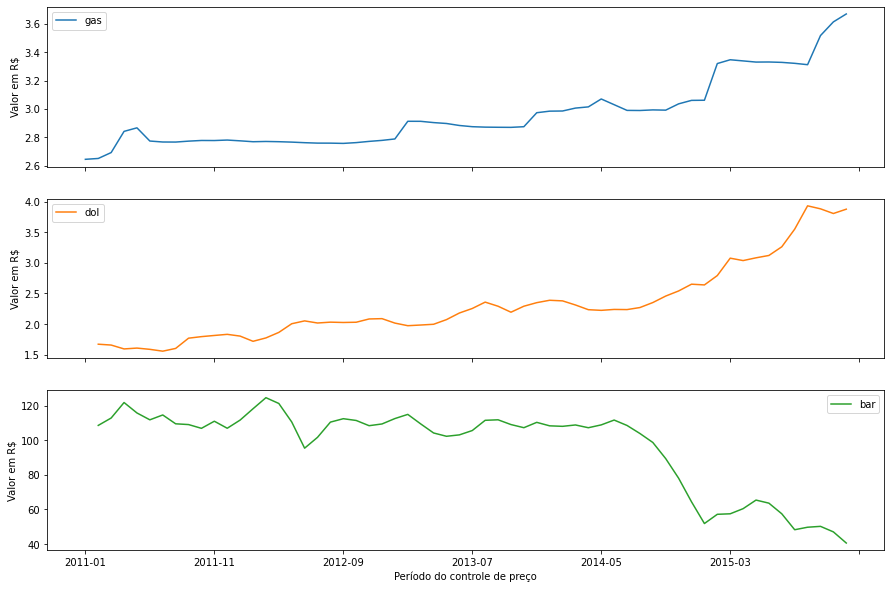

In [237]:
combined11.plot(subplots=True,figsize=(15,10),xlabel='Período do controle de preço',ylabel='Valor em R$')

array([<AxesSubplot:xlabel='Período do PPI', ylabel='Valor em R$'>,
       <AxesSubplot:xlabel='Período do PPI', ylabel='Valor em R$'>,
       <AxesSubplot:xlabel='Período do PPI', ylabel='Valor em R$'>],
      dtype=object)

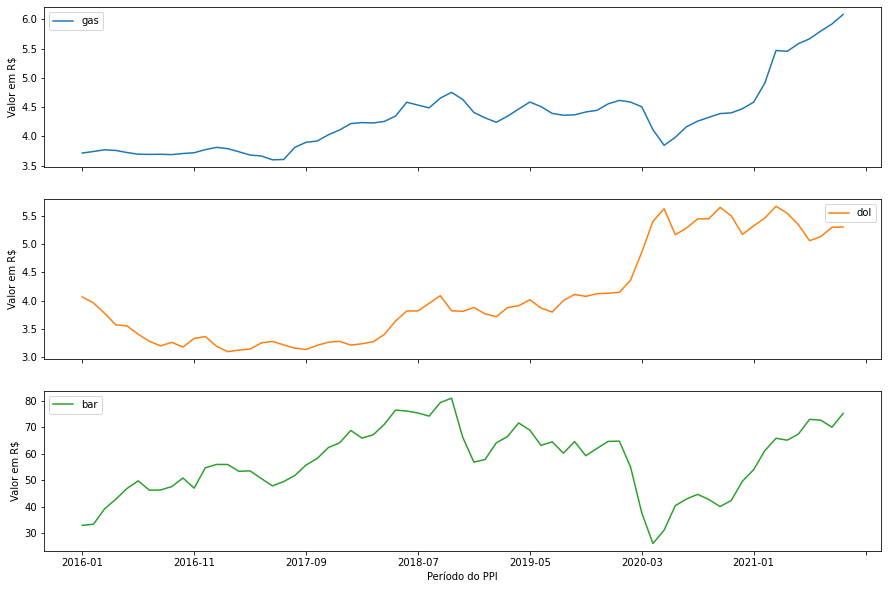

In [238]:
combined22.plot(subplots=True,figsize=(15,10),xlabel='Período do PPI',ylabel='Valor em R$')

# GRÁFICOS DAS VARIAÇÕES COMBINADAS

In [229]:
combined1=pd.DataFrame()
combined1['var_gas']=x1.loc['2011-01':'2015-12','pct_change']
combined1['var_dol']=x2.loc['2011-02':'2015-12','pct_change']
combined1['var_bar']=x3.loc['2011-02':'2015-12','pct_change']

combined2=pd.DataFrame()
combined2['var_gas']=x1.loc['2016-01':,'pct_change']
combined2['var_dol']=x2.loc['2016-01':,'pct_change']
combined2['var_bar']=x3.loc['2016-01':,'pct_change']


array([<AxesSubplot:xlabel='Período do controle de preço', ylabel='Variação percentual'>,
       <AxesSubplot:xlabel='Período do controle de preço', ylabel='Variação percentual'>,
       <AxesSubplot:xlabel='Período do controle de preço', ylabel='Variação percentual'>],
      dtype=object)

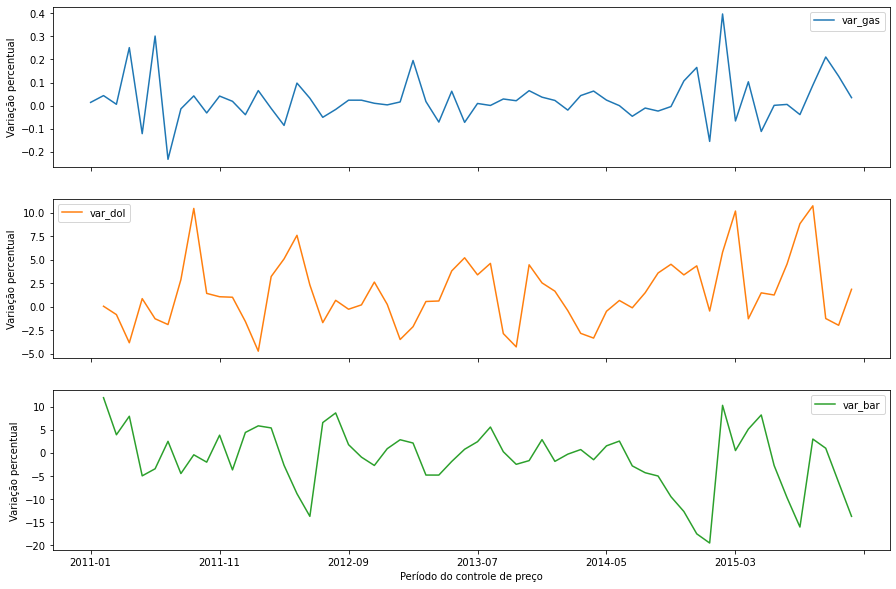

In [239]:
combined1.plot(subplots=True,figsize=(15,10),xlabel='Período do controle de preço',ylabel='Variação percentual')

array([<AxesSubplot:xlabel='Período do PPI', ylabel='Variação percentual'>,
       <AxesSubplot:xlabel='Período do PPI', ylabel='Variação percentual'>,
       <AxesSubplot:xlabel='Período do PPI', ylabel='Variação percentual'>],
      dtype=object)

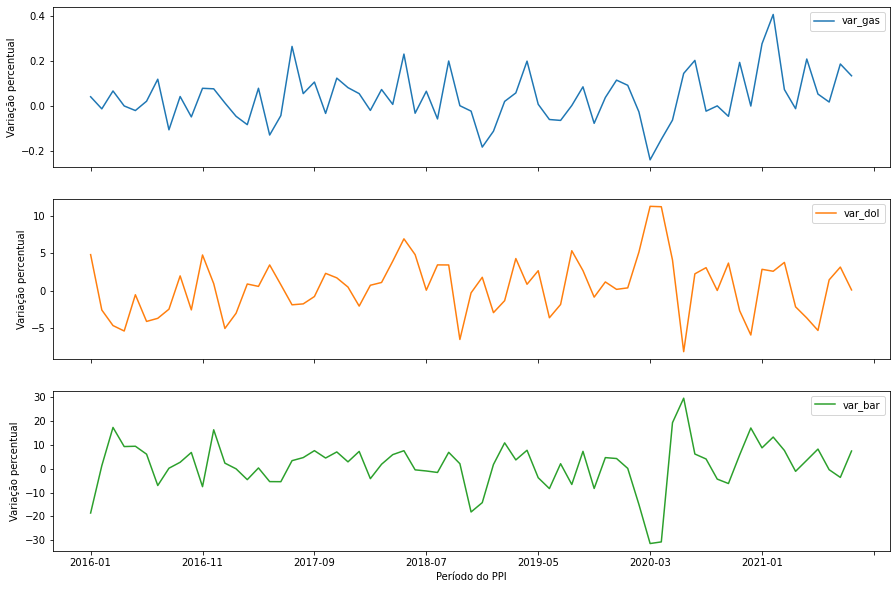

In [240]:
combined2.plot(subplots=True,figsize=(15,10),xlabel='Período do PPI',ylabel='Variação percentual')